In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
#mnist= tf.keras.datasets.mnist

In [28]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [29]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [30]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [31]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

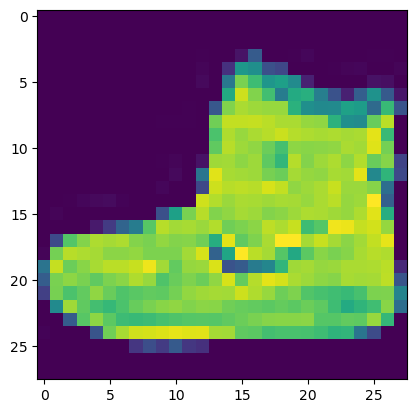

In [32]:
plt.imshow(x_train[0])

In [33]:
print(y_train[0])

9


In [34]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [35]:
x_train=x_train.astype(float)/255.0
x_test=x_test.astype(float)/255.0

In [36]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [37]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPooling2D,Flatten ,Dense

In [39]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='softmax'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 10)          910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)               

In [41]:
import tensorflow
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics=['acc'])

In [42]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [43]:
history=model.fit(x_train,y_train,epochs=30,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/30
118/118 [==============================] - 11s 96ms/step - loss: 2.0551 - acc: 0.2979 - val_loss: 1.5657 - val_acc: 0.3296
Epoch 2/30
118/118 [==============================] - 13s 108ms/step - loss: 1.2290 - acc: 0.4981 - val_loss: 1.0302 - val_acc: 0.6019
Epoch 3/30
118/118 [==============================] - 12s 103ms/step - loss: 0.9560 - acc: 0.6247 - val_loss: 0.9083 - val_acc: 0.6616
Epoch 4/30
118/118 [==============================] - 12s 99ms/step - loss: 0.8590 - acc: 0.6753 - val_loss: 0.8511 - val_acc: 0.6707
Epoch 5/30
118/118 [==============================] - 12s 100ms/step - loss: 0.7935 - acc: 0.7061 - val_loss: 0.7913 - val_acc: 0.6984
Epoch 6/30
118/118 [==============================] - 12s 101ms/step - loss: 0.7506 - acc: 0.7232 - val_loss: 0.7580 - val_acc: 0.7223
Epoch 7/30
118/118 [==============================] - 12s 100ms/step - loss: 0.7217 - acc: 0.7311 - val_loss: 0.7240 - val_acc: 0.7280
Epoch 8/30
118/118 [==============================] - 12s

In [44]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

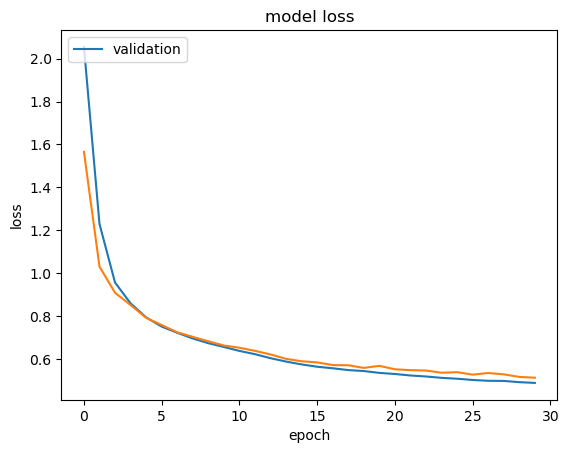

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.legend(['validation'],loc='upper left')
plt.show()

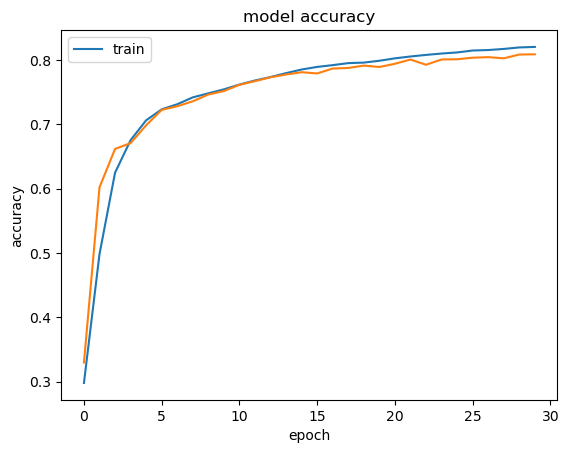

In [46]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()